In [1]:
import torch
import numpy as np

In [17]:
torch.zeros((3,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [35]:
torch.rand(2,4,dtype=torch.float)

tensor([[0.5534, 0.5744, 0.4143, 0.1772],
        [0.6843, 0.8829, 0.0492, 0.5477]])

In [19]:
torch.ones((2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [36]:
x=torch.rand(4,3)

In [47]:
print(x.size())

torch.Size([4, 3])


In [89]:
a=np.array([2.5,4.7,5.2])

In [92]:
y=torch.tensor(a)

In [93]:
print(y)

tensor([2.5000, 4.7000, 5.2000], dtype=torch.float64)


In [67]:
x=torch.tensor([[1,2],[5,1]])
y=torch.tensor([[2,1],[3,4]])
print(x,"\n",y)

tensor([[1, 2],
        [5, 1]]) 
 tensor([[2, 1],
        [3, 4]])


In [78]:
z=x*y
z1=torch.mul(x,y)
z2=torch.matmul(x,y)
print("element wise multiplication \n",z,"\n",z1,"\n matrixmultiplication \n",z2)

element wise multiplication 
 tensor([[ 2,  2],
        [15,  4]]) 
 tensor([[ 2,  2],
        [15,  4]]) 
 matrixmultiplication 
 tensor([[ 8,  9],
        [13,  9]])


In [70]:
a=np.array(x)
b=np.array(y)

In [71]:
a*b

array([[ 2,  2],
       [15,  4]], dtype=int64)

In [88]:
z=y.view(2,2)
z

tensor([[2, 1],
        [3, 4]])

In [101]:
z

tensor([[2, 1],
        [3, 4]])

In [106]:
a=np.array(z)

In [107]:
a

array([[3, 2],
       [4, 5]], dtype=int64)

In [108]:
z.add_(1)
z

tensor([[4, 3],
        [5, 6]])

In [109]:
a

array([[3, 2],
       [4, 5]], dtype=int64)

#### device type

In [112]:
device=torch.device("cuda")

In [113]:
l=torch.ones(5,device=device)

In [117]:
l.device

device(type='cuda', index=0)

In [123]:
m=torch.zeros(5)

In [124]:
m.device

device(type='cpu')

In [125]:
m+=3
m

tensor([3., 3., 3., 3., 3.])

In [126]:
m=m.to(device)

In [127]:
m

tensor([3., 3., 3., 3., 3.], device='cuda:0')

In [128]:
z=l+m

In [129]:
z

tensor([4., 4., 4., 4., 4.], device='cuda:0')

In [130]:
k=z.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [131]:
z=z.to("cpu")

In [132]:
k=z.numpy()

In [133]:
k

array([4., 4., 4., 4., 4.], dtype=float32)

#### gradients 

In [176]:
weights=torch.ones(1,dtype=torch.float32,requires_grad=True)
x=torch.tensor([1],dtype=torch.float32)
output=weights*x
s=output-2
loss=s*s

In [179]:
print(x,weights,output,s,loss)

tensor([1.]) tensor([1.], requires_grad=True) tensor([1.], grad_fn=<MulBackward0>) tensor([-1.], grad_fn=<SubBackward0>) tensor([1.], grad_fn=<MulBackward0>)


In [180]:
loss.backward()

In [181]:
weights.grad

tensor([-2.])

In [164]:
weights.grad.zero_()

tensor([0., 0., 0., 0., 0.])

#### linear regression

In [10]:
X=np.array([1,2,3,4],dtype=np.float32)

In [11]:
Y=np.array([2,4,6,8],dtype=np.float32)

In [23]:
# f=w*x
w=0.0



In [13]:
def forward(x):
    return w*x
def loss_function(y_pred,y):
    return ((y-y_pred)**2).mean()

In [14]:
def gradient(x,y,y_pred):
    return np.dot(2*x,y_pred-y).mean()


In [37]:
alpha=0.01
n_iters=10

for epoch in range(n_iters):
    y_pred=forward(X)
    l=loss_function(y_pred,Y)
    dw=gradient(X,Y,y_pred)
    w=w-alpha*dw
    print(f'epoch : {epoch+1} | loss: {l:.3f} | w: {w:.4f}')

tensor([0.3000, 0.6000, 0.9000, 1.2000])
epoch : 1 | loss: 21.675 | w: 1.3200
tensor([1.3200, 2.6400, 3.9600, 5.2800])
epoch : 2 | loss: 3.468 | w: 1.7280
tensor([1.7280, 3.4560, 5.1840, 6.9120])
epoch : 3 | loss: 0.555 | w: 1.8912
tensor([1.8912, 3.7824, 5.6736, 7.5648])
epoch : 4 | loss: 0.089 | w: 1.9565
tensor([1.9565, 3.9130, 5.8694, 7.8259])
epoch : 5 | loss: 0.014 | w: 1.9826
tensor([1.9826, 3.9652, 5.9478, 7.9304])
epoch : 6 | loss: 0.002 | w: 1.9930
tensor([1.9930, 3.9861, 5.9791, 7.9721])
epoch : 7 | loss: 0.000 | w: 1.9972
tensor([1.9972, 3.9944, 5.9916, 7.9889])
epoch : 8 | loss: 0.000 | w: 1.9989
tensor([1.9989, 3.9978, 5.9967, 7.9955])
epoch : 9 | loss: 0.000 | w: 1.9996
tensor([1.9996, 3.9991, 5.9987, 7.9982])
epoch : 10 | loss: 0.000 | w: 1.9998


#### with torch


In [94]:
import torch
import numpy as np

In [140]:
X=torch.tensor([0,1,2,3,4,5,6,7,8,9,10],dtype=torch.float32)
Y=torch.tensor([1,3,5,7,9,11,13,15,17,19,21],dtype=torch.float32)

In [147]:
w=torch.tensor(0,dtype=torch.float32,requires_grad=True)
b=torch.tensor(0,dtype=torch.float32,requires_grad=True)


In [148]:
def forward(x):
    return w*x+b
def loss_function(y_pred,y):
    return ((y-y_pred)**2).mean()

In [149]:
loss_variables=[]

In [150]:
alpha=0.001
n_iters=10000
for epoch in range(n_iters):
    y_pred=forward(X)

    l=loss_function(y_pred,Y)
    loss_variables.append(l.item())
    l.backward()
    with torch.no_grad():
        w-=alpha*w.grad
        b-=alpha*b.grad
        #print(w)
    w.grad.zero_()
    b.grad.zero_()
    if epoch%10==0:
        print(f'epoch : {epoch+1} | loss: {l:.3f} | w: {w:.4f},b:{b:.4f}')
print(f'f(5): {forward(5)}')

epoch : 1 | loss: 161.000 | w: 0.1500,b:0.0220
epoch : 11 | loss: 36.667 | w: 1.1704,b:0.1729
epoch : 21 | loss: 8.432 | w: 1.6564,b:0.2469
epoch : 31 | loss: 2.018 | w: 1.8877,b:0.2841
epoch : 41 | loss: 0.561 | w: 1.9976,b:0.3038
epoch : 51 | loss: 0.229 | w: 2.0497,b:0.3152
epoch : 61 | loss: 0.152 | w: 2.0742,b:0.3226
epoch : 71 | loss: 0.134 | w: 2.0856,b:0.3281
epoch : 81 | loss: 0.128 | w: 2.0908,b:0.3327
epoch : 91 | loss: 0.126 | w: 2.0930,b:0.3368
epoch : 101 | loss: 0.124 | w: 2.0937,b:0.3407
epoch : 111 | loss: 0.123 | w: 2.0938,b:0.3444
epoch : 121 | loss: 0.122 | w: 2.0936,b:0.3481
epoch : 131 | loss: 0.120 | w: 2.0932,b:0.3518
epoch : 141 | loss: 0.119 | w: 2.0928,b:0.3554
epoch : 151 | loss: 0.118 | w: 2.0923,b:0.3590
epoch : 161 | loss: 0.116 | w: 2.0918,b:0.3626
epoch : 171 | loss: 0.115 | w: 2.0913,b:0.3662
epoch : 181 | loss: 0.114 | w: 2.0908,b:0.3697
epoch : 191 | loss: 0.112 | w: 2.0903,b:0.3732
epoch : 201 | loss: 0.111 | w: 2.0898,b:0.3767
epoch : 211 | loss: 0

In [145]:
import matplotlib.pyplot as plt 

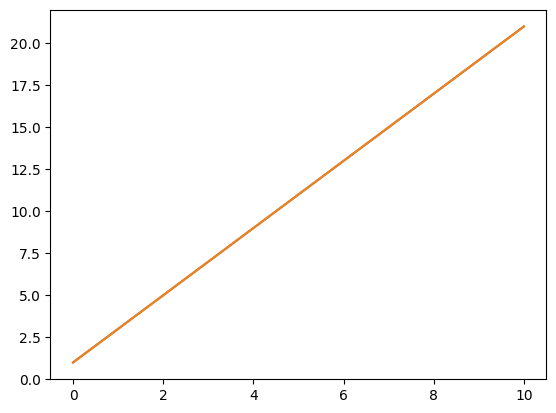

In [146]:
with torch.no_grad():   
    plt.plot(np.array(X),np.array(forward(X)))
    plt.plot(np.array(X),np.array(Y))

#### auto mation of loss function

In [151]:
import torch.nn as nn

In [ ]:
X=torch.tensor([0,1,2,3,4,5,6,7,8,9,10],dtype=torch.float32)
Y=torch.tensor([1,3,5,7,9,11,13,15,17,19,21],dtype=torch.float32)

In [152]:
loss=nn.MSELoss()

In [154]:
w=torch.tensor(0,dtype=torch.float32,requires_grad=True)
b=torch.tensor(0,dtype=torch.float32,requires_grad=True)

In [158]:
def forward(x):
    return w*x+b

In [155]:
optimizer=torch.optim.SGD([w,b],lr=0.01)


In [156]:
n_iter=1000

In [159]:
for epoch in range(n_iter):
    y_pred=forward(X)
    l=loss(y_pred,Y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%10==0:
        print(f'epoch : {epoch+1} | loss: {l:.3f} | w: {w:.4f},b:{b:.4f}')
print(f'f(5): {forward(5)}')

    


epoch : 1 | loss: 161.000 | w: 1.5000,b:0.2200
epoch : 11 | loss: 0.124 | w: 2.0944,b:0.3443
epoch : 21 | loss: 0.111 | w: 2.0893,b:0.3801
epoch : 31 | loss: 0.099 | w: 2.0844,b:0.4139
epoch : 41 | loss: 0.089 | w: 2.0798,b:0.4459
epoch : 51 | loss: 0.079 | w: 2.0754,b:0.4762
epoch : 61 | loss: 0.071 | w: 2.0713,b:0.5048
epoch : 71 | loss: 0.063 | w: 2.0674,b:0.5318
epoch : 81 | loss: 0.057 | w: 2.0637,b:0.5574
epoch : 91 | loss: 0.051 | w: 2.0603,b:0.5815
epoch : 101 | loss: 0.045 | w: 2.0570,b:0.6044
epoch : 111 | loss: 0.040 | w: 2.0539,b:0.6260
epoch : 121 | loss: 0.036 | w: 2.0509,b:0.6464
epoch : 131 | loss: 0.032 | w: 2.0481,b:0.6657
epoch : 141 | loss: 0.029 | w: 2.0455,b:0.6840
epoch : 151 | loss: 0.026 | w: 2.0430,b:0.7012
epoch : 161 | loss: 0.023 | w: 2.0407,b:0.7175
epoch : 171 | loss: 0.021 | w: 2.0385,b:0.7330
epoch : 181 | loss: 0.018 | w: 2.0364,b:0.7475
epoch : 191 | loss: 0.016 | w: 2.0344,b:0.7613
epoch : 201 | loss: 0.015 | w: 2.0325,b:0.7744
epoch : 211 | loss: 0.

#### full model automation

In [202]:
import torch.nn as nn

In [241]:
X=torch.tensor([[1],[2],[3],[4],[5]],dtype=torch.float32,device="cuda")
Y=torch.tensor([[3],[5],[7],[9],[11]],dtype=torch.float32,device="cuda")

In [242]:
X.shape

torch.Size([5, 1])

In [243]:
n_samples,n_features=X.shape

In [244]:
n_input=n_features
n_ouput=n_features

In [245]:
model=nn.Linear(n_input,n_ouput,device="cuda")

In [246]:
alpha=0.01

In [247]:
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=alpha)

In [248]:
n_iters=1000
for epoch in range(n_iters):
    y_pred=model(X)
    l=loss(y_pred,Y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w,b]=model.parameters()
    if epoch%10==0:
        print(f'epoch : {epoch+1} | loss: {l:.3f} | w: {w[0][0].item():.4f},b:{b[0].item():.4f}')
print(f'f(5): {model(torch.tensor([5],dtype=torch.float32,device="cuda"))}')

epoch : 1 | loss: 79.865 | w: 0.0787,b:0.5062
epoch : 11 | loss: 0.361 | w: 1.8620,b:0.9989
epoch : 21 | loss: 0.002 | w: 1.9821,b:1.0309
epoch : 31 | loss: 0.000 | w: 1.9905,b:1.0320
epoch : 41 | loss: 0.000 | w: 1.9913,b:1.0311
epoch : 51 | loss: 0.000 | w: 1.9917,b:1.0301
epoch : 61 | loss: 0.000 | w: 1.9919,b:1.0291
epoch : 71 | loss: 0.000 | w: 1.9922,b:1.0281
epoch : 81 | loss: 0.000 | w: 1.9925,b:1.0272
epoch : 91 | loss: 0.000 | w: 1.9927,b:1.0263
epoch : 101 | loss: 0.000 | w: 1.9930,b:1.0254
epoch : 111 | loss: 0.000 | w: 1.9932,b:1.0246
epoch : 121 | loss: 0.000 | w: 1.9934,b:1.0237
epoch : 131 | loss: 0.000 | w: 1.9936,b:1.0230
epoch : 141 | loss: 0.000 | w: 1.9939,b:1.0222
epoch : 151 | loss: 0.000 | w: 1.9941,b:1.0214
epoch : 161 | loss: 0.000 | w: 1.9943,b:1.0207
epoch : 171 | loss: 0.000 | w: 1.9944,b:1.0200
epoch : 181 | loss: 0.000 | w: 1.9946,b:1.0194
epoch : 191 | loss: 0.000 | w: 1.9948,b:1.0187
epoch : 201 | loss: 0.000 | w: 1.9950,b:1.0181
epoch : 211 | loss: 0.0